# MLToolKit Regression Example
## Generated Dataset
Create Date: July 15, 2019; Last Update: December 31, 2019. 
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)
<hr>

### Current release: PyMLToolKit [v0.1.10]

MLToolkit (mltk) is a Python package providing a set of user-friendly functions to help building machine learning models in data science research, teaching or production focused projects. MLToolkit supports all stages of the machine learning application development process.

### Installation
```
pip install pymltoolkit
```
If the installation failed with dependancy issues, execute the above command with --no-dependencies

```
pip install pymltoolkit --no-dependencies
```

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import mltk

mltk==0.1.11

Some functions of MLToolKit depends on number of Open Source Python Libraries such as
- Data Manipulation : Pandas
- Machine Learning: Statsmodels, Scikit-learn, Catboost
- Deep Learning: Tensorflow, 
- Model Interpretability: Shap, Lime
- Server Framework: Flask
- Text Processing: BeautifulSoup, TextLab
- Database Connectivity: SQLAlchemy, PyODBC
MLToolkit Project acknowledge the creators and contributors of the above libraries for their contribution to the Open Source Community.



# 1. Generate Synthetic Dataset

,x,A,B,C,D,k,y,noise_amp,measured
0,0.10000,0.10000,0.09983,24.01000,0.31623,1,5.02914,0.3,5.18343
1,0.10398,0.10398,0.10379,23.97100,0.32246,1,5.04256,0.3,4.72747
2,0.10796,0.10796,0.10775,23.93204,0.32858,1,5.05583,0.3,5.39849
3,0.11194,0.11194,0.11171,23.89311,0.33458,1,5.06897,0.3,5.01574
4,0.11592,0.11592,0.11566,23.85421,0.34047,1,5.08198,0.3,4.76875


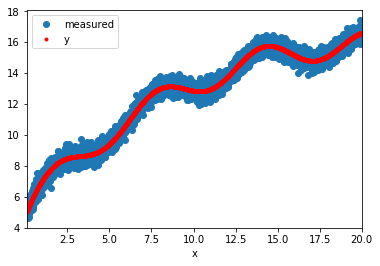

In [2]:
nsample = 5000
min_val = 0.1
max_val = 20
x = np.linspace(min_val, max_val, nsample)
noise_amp = 0.3

A = x
B = np.sin(x)
C = (x-5)**2
D = np.sqrt(x)
k = 1

y = 0.5*A + 0.8*B + -0.02*C + 1.2*D + 5*k 
measured = y +  noise_amp * np.random.normal(size=nsample)

data = {'x':x, 'A':A, 'B':B, 'C':C, 'D':D, 'k':k, 'y':y, 'noise_amp':noise_amp, 'measured':measured}
Data = pd.DataFrame(data=data)

Data.plot(x='x', y=['measured', 'y'], style=['o', 'r.'])

Data.head()

# 2. Explore Features

In [3]:
identifierColumns = ['x']
categoryVariables = ['AGRP', 'BGRP', 'CGRP', 'DGRP']
binaryVariables = []
targetVariable = 'measured'

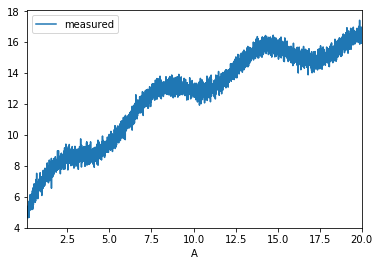

In [4]:
Data.plot(x='A', y='measured')

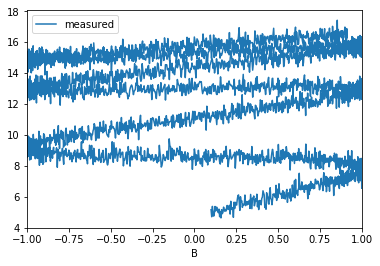

In [5]:
Data.plot(x='B', y='measured')

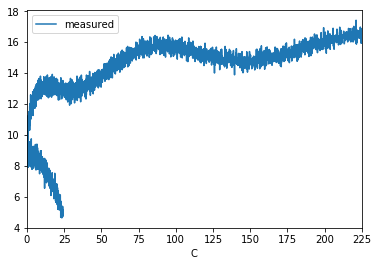

In [6]:
Data.plot(x='C', y='measured')

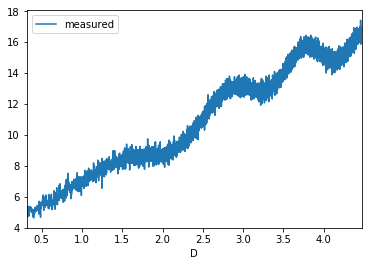

In [7]:
Data.plot(x='D', y='measured')

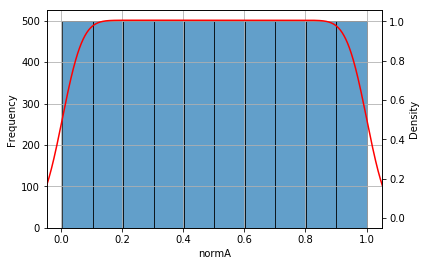

,counts,density
normA,,
"1_[0.005,0.1045]",500,1.01
"2_[0.1045,0.204]",500,1.01
"3_[0.204,0.3035]",500,1.01
"4_[0.3035,0.403]",500,1.01
"5_[0.403,0.5025]",500,1.01
"6_[0.5025,0.602]",500,1.01
"7_[0.602,0.7015]",500,1.01
"8_[0.7015,0.801]",500,1.01
"9_[0.801,0.9005]",500,1.01


In [8]:
rule_set = {
    "operation":"normalize", 
    'variables': {
        'source':'A', 
        'destination':'normA'
    },
    "parameters":{"method":"maxscale"}
}
Data, transformed_variable = mltk.create_transformed_variable_task(Data, rule_set, return_variable=True)
table = mltk.histogram(Data, variable=transformed_variable, n_bins=10, orientation='vertical', density=True, show_plot=True)
table.style.background_gradient(cmap='Greens').set_precision(3)

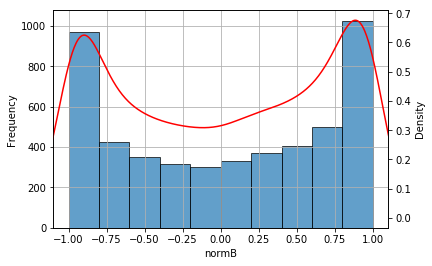

,counts,density
normB,,
"1_[-1,-0.8]",970,0.97
"2_[-0.8,-0.6]",427,0.427
"3_[-0.6,-0.4]",350,0.35
"4_[-0.4,-0.2]",317,0.317
"5_[-0.2,-8.82371e-08]",304,0.304
"6_[-8.82371e-08,0.2]",329,0.329
"7_[0.2,0.4]",370,0.37
"8_[0.4,0.6]",407,0.407
"9_[0.6,0.8]",499,0.499


In [9]:
rule_set = {
    "operation":"normalize", 
    'variables': {
        'source':'B', 
        'destination':'normB'
    },
    "parameters":{"method":"maxscale"}
}
Data, transformed_variable = mltk.create_transformed_variable_task(Data, rule_set, return_variable=True)
table = mltk.histogram(Data, variable=transformed_variable, n_bins=10, orientation='vertical', density=True, show_plot=True)
table.style.background_gradient(cmap='Greens').set_precision(3)

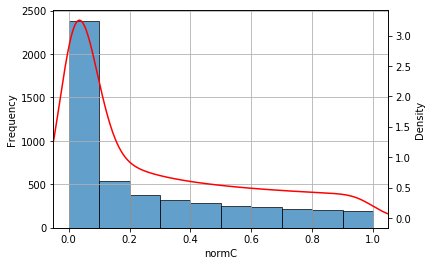

,counts,density
normC,,
"1_[5.7623e-10,0.1]",2383,4.77
"2_[0.1,0.2]",534,1.07
"3_[0.2,0.3]",378,0.756
"4_[0.3,0.4]",320,0.64
"5_[0.4,0.5]",281,0.562
"6_[0.5,0.6]",254,0.508
"7_[0.6,0.7]",234,0.468
"8_[0.7,0.8]",218,0.436
"9_[0.8,0.9]",204,0.408


In [10]:
rule_set = {
    "operation":"normalize", 
    'variables': {
        'source':'C', 
        'destination':'normC'
    },
    "parameters":{"method":"maxscale"}
}
Data, transformed_variable = mltk.create_transformed_variable_task(Data, rule_set, return_variable=True)
table = mltk.histogram(Data, variable=transformed_variable, n_bins=10, orientation='vertical', density=True, show_plot=True)
table.style.background_gradient(cmap='Greens').set_precision(3)

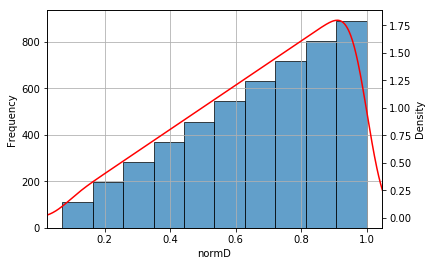

,counts,density
normD,,
"1_[0.0707107,0.16364]",110,0.237
"2_[0.16364,0.256569]",196,0.422
"3_[0.256569,0.349497]",283,0.609
"4_[0.349497,0.442426]",370,0.796
"5_[0.442426,0.535355]",456,0.981
"6_[0.535355,0.628284]",544,1.17
"7_[0.628284,0.721213]",630,1.36
"8_[0.721213,0.814142]",717,1.54
"9_[0.814142,0.907071]",803,1.73


In [11]:
rule_set = {
    "operation":"normalize", 
    'variables': {
        'source':'D', 
        'destination':'normD'
    },
    "parameters":{"method":"maxscale"}
}
Data, transformed_variable = mltk.create_transformed_variable_task(Data, rule_set, return_variable=True)
table = mltk.histogram(Data, variable=transformed_variable, n_bins=10, orientation='vertical', density=True, show_plot=True)
table.style.background_gradient(cmap='Greens').set_precision(3)

In [12]:
rule_set = {
    "operation":"normalize", 
    'variables': {
        'source':'k', 
        'destination':'normk'
    },
    "parameters":{"method":"maxscale"}
}
Data, transformed_variable = mltk.create_transformed_variable_task(Data, rule_set, return_variable=True)
#table = mltk.histogram(Data, variable=transformed_variable, n_bins=10, orientation='vertical', density=True, show_plot=True)
#table.style.background_gradient(cmap='Greens').set_precision(3)

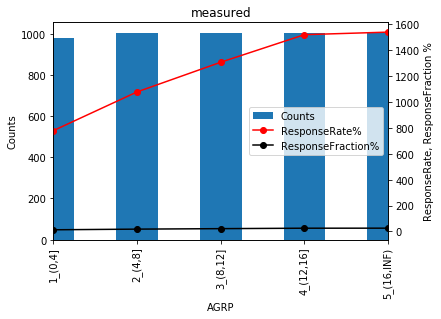

,Counts,measured,CountsFraction%,ResponseFraction%,ResponseRate%
AGRP,,,,,
"1_(0,4]",980,7632,19.6,12.23763,778.77551
"2_(4,8]",1005,10833,20.1,17.37032,1077.91045
"3_(8,12]",1005,13140,20.1,21.06951,1307.46269
"4_(12,16]",1005,15281,20.1,24.50253,1520.49751
"5_(16,INF)",1005,15479,20.1,24.82001,1540.19900
TOTAL,5000,62365,100.0,100.00000,1247.30000


In [13]:
rule_set = {   
    'operation':'bucket',
    'variables': {
        'source':'A', 
        'destination':None
    },
    'parameters': {
        'labels_str': ['0', '4', '8', '12', '16', 'INF'],
        'right_inclusive':True,
        "default":'OTHER',
        "null": 'NA'
    }
}
Data, categoryVariable = mltk.create_categorical_variable_task(Data, rule_set, return_variable=True)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

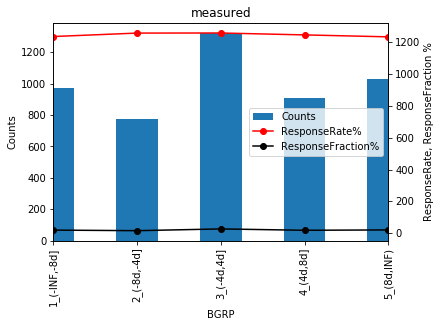

,Counts,measured,CountsFraction%,ResponseFraction%,ResponseRate%
BGRP,,,,,
"1_(-INF,-8d]",970,11996,19.40,19.23484,1236.70103
"2_(-8d,-4d]",777,9777,15.54,15.67681,1258.30116
"3_(-4d,4d]",1320,16617,26.40,26.64433,1258.86364
"4_(4d,8d]",906,11296,18.12,18.11243,1246.79912
"5_(8d,INF)",1027,12680,20.54,20.33159,1234.66407
TOTAL,5000,62366,100.00,100.00000,1247.32000


In [14]:
rule_set = {   
    'operation':'bucket',
    'variables': {
        'source':'B', 
        'destination':None
    },
    'parameters': {
        'labels_str': ['-INF', '-8d', '-4d', '4d', '8d','INF'],
        'right_inclusive':True,
        "default":'OTHER',
        "null": 'NA'
    }
}
Data, categoryVariable = mltk.create_categorical_variable_task(Data, rule_set, return_variable=True)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

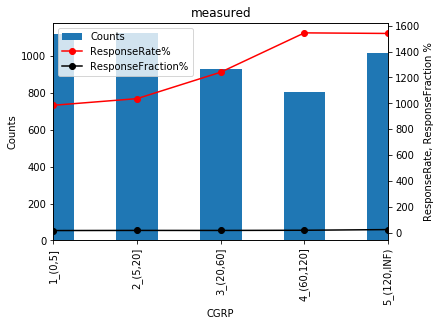

,Counts,measured,CountsFraction%,ResponseFraction%,ResponseRate%
CGRP,,,,,
"1_(0,5]",1123,11064,22.46,17.74044,985.21817
"2_(5,20]",1124,11651,22.48,18.68165,1036.56584
"3_(20,60]",930,11540,18.60,18.50367,1240.86022
"4_(60,120]",806,12449,16.12,19.96120,1544.54094
"5_(120,INF)",1017,15662,20.34,25.11304,1540.01967
TOTAL,5000,62366,100.00,100.00000,1247.32000


In [15]:
rule_set = {   
    'operation':'bucket',
    'variables': {
        'source':'C', 
        'destination':None
    },
    'parameters': {
        'labels_str': ['0', '5', '20', '60', '120', 'INF'],
        'right_inclusive':True,
        "default":'OTHER',
        "null": 'NA'
    }
}
Data, categoryVariable = mltk.create_categorical_variable_task(Data, rule_set, return_variable=True)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

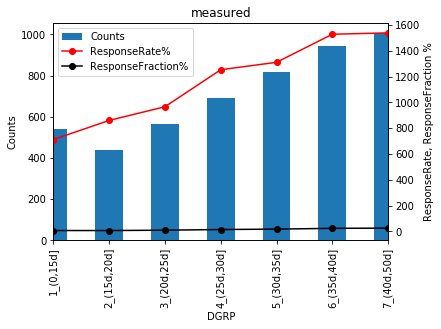

,Counts,measured,CountsFraction%,ResponseFraction%,ResponseRate%
DGRP,,,,,
"1_(0,15d]",541,3853,10.82,6.17824,712.19963
"2_(15d,20d]",439,3778,8.78,6.05798,860.59226
"3_(20d,25d]",565,5463,11.30,8.75986,966.90265
"4_(25d,30d]",691,8665,13.82,13.89423,1253.97974
"5_(30d,35d]",817,10717,16.34,17.18459,1311.75031
"6_(35d,40d]",942,14409,18.84,23.10468,1529.61783
"7_(40d,50d]",1005,15479,20.10,24.82041,1540.19900
TOTAL,5000,62364,100.00,100.00000,1247.28000


In [16]:
rule_set = {   
    'operation':'bucket',
    'variables': {
        'source':'D', 
        'destination':None
    },
    'parameters': {
        'labels_str': ['0', '15d', '20d', '25d', '30d', '35d', '40d', '50d', 'INF'],
        'right_inclusive':True,
        "default":'OTHER',
        "null": 'NA'
    }
}
Data, categoryVariable = mltk.create_categorical_variable_task(Data, rule_set, return_variable=True)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

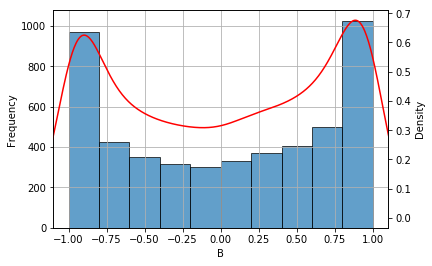

,counts,density
B,,
"1_[-1,-0.8]",970,0.97
"2_[-0.8,-0.6]",427,0.427
"3_[-0.6,-0.4]",350,0.35
"4_[-0.4,-0.2]",317,0.317
"5_[-0.2,-8.82371e-08]",304,0.304
"6_[-8.82371e-08,0.2]",329,0.329
"7_[0.2,0.4]",370,0.37
"8_[0.4,0.6]",407,0.407
"9_[0.6,0.8]",499,0.499


In [17]:
table = mltk.histogram(Data, variable='B', n_bins=10, orientation='vertical', density=True, show_plot=True)
table.style.background_gradient(cmap='Greens').set_precision(3)

## One-Hot Encode

In [18]:
Data, featureVariables, targetVariable = mltk.to_one_hot_encode(Data, category_variables=categoryVariables, binary_variables=binaryVariables, target_variable=targetVariable)
Data[identifierColumns+featureVariables+[targetVariable]].sample(5).transpose()

,3206,4692,2319,3381,3815
x,12.86243,18.77790,9.33147,13.55907,15.28674
"AGRP_1_(0,4]",0.00000,0.00000,0.00000,0.00000,0.00000
"AGRP_2_(4,8]",0.00000,0.00000,0.00000,0.00000,0.00000
"AGRP_3_(8,12]",0.00000,0.00000,1.00000,0.00000,0.00000
"AGRP_4_(12,16]",1.00000,0.00000,0.00000,1.00000,1.00000
"AGRP_5_(16,INF)",0.00000,1.00000,0.00000,0.00000,0.00000
"BGRP_1_(-INF,-8d]",0.00000,0.00000,0.00000,0.00000,0.00000
"BGRP_2_(-8d,-4d]",0.00000,0.00000,0.00000,0.00000,0.00000
"BGRP_3_(-4d,4d]",1.00000,1.00000,1.00000,0.00000,0.00000
"BGRP_4_(4d,8d]",0.00000,0.00000,0.00000,0.00000,1.00000


## 3. Split Train, Validate, Test

In [19]:
TrainDataset, ValidateDataset, TestDataset = mltk.train_validate_test_split(Data, ratios=(0.6,0.4))

Validate = Test
Train Samples: 3000 [60.0%]
Validate Samples: 2000 [40.0%]
Test Samples: 2000 [40.0%]


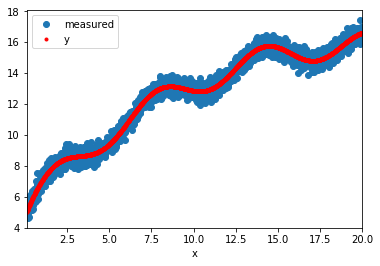

In [20]:
TrainDataset.plot(x='x', y=['measured', 'y'], style=['o', 'r.'])

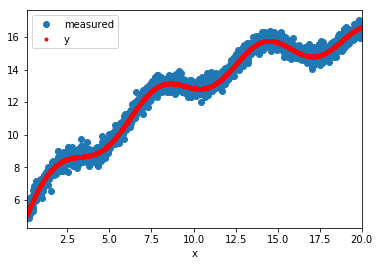

In [21]:
ValidateDataset.plot(x='x', y=['measured', 'y'], style=['o', 'r.'])

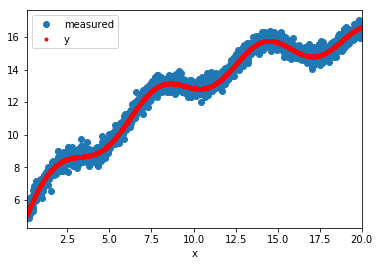

In [22]:
TestDataset.plot(x='x', y=['measured', 'y'], style=['o', 'r.'])

# 4. Setup Variables

In [23]:
modelVariables = ['A', 'B', 'C', 'D', 'k']
targetVariable = 'measured'

# 5. Setup Model

In [24]:
sample_attributes = {'SampleDescription':'Regression Example',
                    'NumClasses':2,
                     'DataFormat':'table',
                    'RecordIdentifiers':[]
                    }

score_parameters = {'Edges':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    'Percentiles':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    'Threshold':0.0,
                   'Quantiles':10,
                   'ScoreVariable':'PredictedAmount',
                   'ScoreLabel':'Score',
                   'QuantileLabel':'Quantile',
                    'PredictedLabel':'Predicted'
                   }

model_attributes = {'ModelID': None,   
                   'ModelName': 'REGModel',
                   'Version':'0.1',
                    'ModelType':'regression'
                   }

## 5.1 Fit Linear Regression Model

In [25]:
model_parameters = {'MLAlgorithm':'LREG', 'MaxIterations':100}

### 5.1.1 Fit Using Raw Variables

In [26]:
LREGModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=False
                                  )

Train samples: 3000 loded...
Validate samples: 2000 loded...
Test samples: 2000 loded...
{'ModelID': 'REGMODELLREG20200212194927', 'ModelName': 'REGModel', 'Version': '0.1', 'ModelType': 'regression', 'MLTKVersion': '0.1.11', 'BuiltTime': '20200212194927', 'ModelFitTime': -1}
{'MLAlgorithm': 'LREG', 'MaxIterations': 100}
Regression Example
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Percentiles': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Threshold': 0.0, 'Quantiles': 10, 'ScoreVariable': 'PredictedAmount', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}


In [27]:
print(LREGModel.model_attributes['ModelID'])
print(LREGModel.model_interpretation['ModelSummary'])
print('RMSE:', LREGModel.get_rmse())
print('R^2: ', LREGModel.get_r2())

REGMODELLREG20200212194927
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.331e+04
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:49:28   Log-Likelihood:                -647.19
No. Observations:                3000   AIC:                             1304.
Df Residuals:                    2995   BIC:                             1334.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A              0.4968    

In [28]:
LREGModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,MinPredictedAmount,MaxPredictedAmount,MeanPredictedAmount,BucketCount,PredictedAmount,ResponseAmount,BucketFraction,ResponseFraction,BucketMeanAmount,CumulativeBucketFraction,CumulativeResponseFraction,CumulativeMeanAmount
Quantile,,,,,,,,,,,,
1,4.99,8.12,6.88,200,1.38e+03,1.38e+03,0.1,0.0557,6.9,1,1,12.4
2,8.13,8.74,8.53,200,1.71e+03,1.71e+03,0.1,0.0692,8.56,0.9,0.944,13
3,8.74,10.6,9.44,200,1.89e+03,1.89e+03,0.1,0.0762,9.43,0.8,0.875,13.6
4,10.6,12.8,11.8,200,2.36e+03,2.37e+03,0.1,0.0955,11.8,0.7,0.799,14.1
5,12.8,13,12.9,200,2.58e+03,2.59e+03,0.1,0.104,12.9,0.6,0.703,14.5
6,13,13.5,13.2,200,2.63e+03,2.63e+03,0.1,0.106,13.2,0.5,0.599,14.8
7,13.5,14.8,14.4,200,2.88e+03,2.88e+03,0.1,0.116,14.4,0.4,0.493,15.2
8,14.8,15.3,15,200,3.01e+03,3.01e+03,0.1,0.122,15.1,0.3,0.376,15.5
9,15.3,15.7,15.5,200,3.11e+03,3.11e+03,0.1,0.125,15.5,0.2,0.255,15.8


### 5.1.2 Fit Using Normalized Variables

In [29]:
modelVariables = ['normA', 'normB', 'normC', 'normD', 'normk']
LREGModel2 = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=False
                                  )

print(LREGModel2.model_attributes['ModelID'])
print(LREGModel2.model_interpretation['ModelSummary'])
print('RMSE:', LREGModel2.get_rmse())
print('R^2: ', LREGModel2.get_r2())

LREGModel2.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

Train samples: 3000 loded...
Validate samples: 2000 loded...
Test samples: 2000 loded...
{'ModelID': 'REGMODELLREG20200212194928', 'ModelName': 'REGModel', 'Version': '0.1', 'ModelType': 'regression', 'MLTKVersion': '0.1.11', 'BuiltTime': '20200212194928', 'ModelFitTime': -1}
{'MLAlgorithm': 'LREG', 'MaxIterations': 100}
Regression Example
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Percentiles': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Threshold': 0.0, 'Quantiles': 10, 'ScoreVariable': 'PredictedAmount', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}
REGMODELLREG20200212194928
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.331e+04
Date:                Wed, 

,MinPredictedAmount,MaxPredictedAmount,MeanPredictedAmount,BucketCount,PredictedAmount,ResponseAmount,BucketFraction,ResponseFraction,BucketMeanAmount,CumulativeBucketFraction,CumulativeResponseFraction,CumulativeMeanAmount
Quantile,,,,,,,,,,,,
1,4.99,8.12,6.88,200,1.38e+03,1.38e+03,0.1,0.0557,6.9,1,1,12.4
2,8.13,8.74,8.53,200,1.71e+03,1.71e+03,0.1,0.0692,8.56,0.9,0.944,13
3,8.74,10.6,9.44,200,1.89e+03,1.89e+03,0.1,0.0762,9.43,0.8,0.875,13.6
4,10.6,12.8,11.8,200,2.36e+03,2.37e+03,0.1,0.0955,11.8,0.7,0.799,14.1
5,12.8,13,12.9,200,2.58e+03,2.59e+03,0.1,0.104,12.9,0.6,0.703,14.5
6,13,13.5,13.2,200,2.63e+03,2.63e+03,0.1,0.106,13.2,0.5,0.599,14.8
7,13.5,14.8,14.4,200,2.88e+03,2.88e+03,0.1,0.116,14.4,0.4,0.493,15.2
8,14.8,15.3,15,200,3.01e+03,3.01e+03,0.1,0.122,15.1,0.3,0.376,15.5
9,15.3,15.7,15.5,200,3.11e+03,3.11e+03,0.1,0.125,15.5,0.2,0.255,15.8


## 5.2 Fit Random Forest Regression Model

In [30]:
model_parameters = {'MLAlgorithm':'RFREG', # 'LRFREG'
                    'NTrees':200,
                   'MaxDepth':10,
                   'MinSamplesToSplit':6,
                   'Processors':2} 

### 5.2.1 Fit Using Raw Variables

In [31]:
RFREGModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=False
                                  )

Train samples: 3000 loded...
Validate samples: 2000 loded...
Test samples: 2000 loded...
{'ModelID': 'REGMODELRFREG20200212194929', 'ModelName': 'REGModel', 'Version': '0.1', 'ModelType': 'regression', 'MLTKVersion': '0.1.11', 'BuiltTime': '20200212194929', 'ModelFitTime': -1}
{'MLAlgorithm': 'RFREG', 'NTrees': 200, 'MaxDepth': 10, 'MinSamplesToSplit': 6, 'Processors': 2}
Regression Example
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Percentiles': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Threshold': 0.0, 'Quantiles': 10, 'ScoreVariable': 'PredictedAmount', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}


In [32]:
print(RFREGModel.model_attributes['ModelID'])
print(RFREGModel.model_interpretation['ModelSummary'])
print('RMSE:', RFREGModel.get_rmse())
print('R^2: ', RFREGModel.get_r2())

REGMODELRFREG20200212194929
  Features  Importances    stdev
3    normD      0.48941  0.40175
0    normA      0.43671  0.40955
2    normC      0.06669  0.05522
1    normB      0.00720  0.00237
4    normk      0.00000  0.00000
RMSE: 0.3140544815101011
R^2:  0.9892415130237985


In [33]:
RFREGModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,MinPredictedAmount,MaxPredictedAmount,MeanPredictedAmount,BucketCount,PredictedAmount,ResponseAmount,BucketFraction,ResponseFraction,BucketMeanAmount,CumulativeBucketFraction,CumulativeResponseFraction,CumulativeMeanAmount
Quantile,,,,,,,,,,,,
1,4.88,8.1,6.9,200,1.38e+03,1.38e+03,0.1,0.0557,6.9,1,1,12.4
2,8.1,8.77,8.51,200,1.7e+03,1.71e+03,0.1,0.0692,8.57,0.9,0.944,13
3,8.77,10.5,9.46,200,1.89e+03,1.89e+03,0.1,0.0761,9.43,0.8,0.875,13.6
4,10.6,12.7,11.8,200,2.35e+03,2.37e+03,0.1,0.0956,11.8,0.7,0.799,14.1
5,12.7,13.1,12.9,200,2.58e+03,2.59e+03,0.1,0.105,12.9,0.6,0.703,14.5
6,13.1,13.5,13.2,200,2.63e+03,2.63e+03,0.1,0.106,13.2,0.5,0.599,14.8
7,13.5,14.8,14.4,200,2.88e+03,2.88e+03,0.1,0.116,14.4,0.4,0.493,15.2
8,14.9,15.3,15,200,3.01e+03,3.01e+03,0.1,0.122,15.1,0.3,0.376,15.5
9,15.3,15.7,15.5,200,3.1e+03,3.11e+03,0.1,0.125,15.5,0.2,0.255,15.8


### 5.2.2 Fit Using One-Hot Encoded Variables

In [34]:
modelVariables = featureVariables
mltk.to_one_hot_encode(TrainDataset)

RFREGModel2 = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=False
                                  )

print(RFREGModel2.model_attributes['ModelID'])
print(RFREGModel2.model_interpretation['ModelSummary'])
print('RMSE:', RFREGModel2.get_rmse())
print('R^2: ', RFREGModel2.get_r2())

RFREGModel2.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

Category columns [] does not specified nor exists
Error in creating feature variables.
Train samples: 3000 loded...
Validate samples: 2000 loded...
Test samples: 2000 loded...
{'ModelID': 'REGMODELRFREG20200212194931', 'ModelName': 'REGModel', 'Version': '0.1', 'ModelType': 'regression', 'MLTKVersion': '0.1.11', 'BuiltTime': '20200212194931', 'ModelFitTime': -1}
{'MLAlgorithm': 'RFREG', 'NTrees': 200, 'MaxDepth': 10, 'MinSamplesToSplit': 6, 'Processors': 2}
Regression Example
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Percentiles': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Threshold': 0.0, 'Quantiles': 10, 'ScoreVariable': 'PredictedAmount', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}
REGMODELRFREG20200212194931
             Features  Importances    stdev
0        AGRP_1_(0,4]  6.00769e-01  0.01148
10       CGRP_1_(0,5]  2.51166e-01  0.01022
2       AGRP_3_(8,12]  6.40599e-02  0.00276
12     CGRP_3_(20,60]  1.9

,MinPredictedAmount,MaxPredictedAmount,MeanPredictedAmount,BucketCount,PredictedAmount,ResponseAmount,BucketFraction,ResponseFraction,BucketMeanAmount,CumulativeBucketFraction,CumulativeResponseFraction,CumulativeMeanAmount
Quantile,,,,,,,,,,,,
1,5.39,7.81,7.12,235,1.67e+03,1.67e+03,0.117,0.0675,7.11,1,1,12.4
2,8.48,8.68,8.59,170,1.46e+03,1.47e+03,0.085,0.0592,8.62,0.882,0.932,13.1
3,9.24,10.8,9.7,237,2.3e+03,2.3e+03,0.118,0.0927,9.69,0.797,0.873,13.6
4,11.3,12.7,12.1,182,2.21e+03,2.23e+03,0.091,0.0899,12.2,0.679,0.781,14.2
5,13,13.1,13,210,2.73e+03,2.74e+03,0.105,0.111,13,0.588,0.691,14.6
6,13.1,13.2,13.1,189,2.48e+03,2.48e+03,0.0945,0.1,13.1,0.483,0.58,14.9
7,13.2,14.9,14.6,212,3.09e+03,3.1e+03,0.106,0.125,14.6,0.389,0.48,15.3
8,15.1,15.2,15.1,174,2.63e+03,2.64e+03,0.087,0.106,15.2,0.282,0.355,15.6
9,15.4,15.7,15.5,220,3.42e+03,3.42e+03,0.11,0.138,15.6,0.196,0.248,15.7


# 6. Select Model

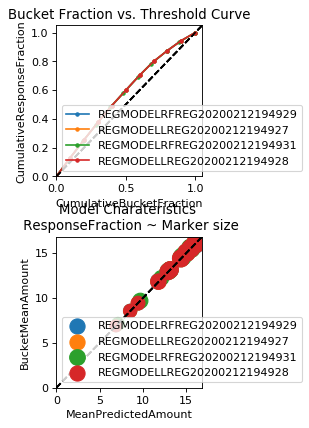

In [35]:
RFREGModel.plot_eval_matrics(comparison=True)
LREGModel.plot_eval_matrics(comparison=True)
RFREGModel2.plot_eval_matrics(comparison=True)
LREGModel2.plot_eval_matrics(comparison=True)

In [36]:
SelectModel = RFREGModel

scoreVariable = SelectModel.get_score_variable()
scoreLabel = SelectModel.get_score_label()

TestDataset = mltk.score_processed_dataset(TestDataset, SelectModel, edges=None, score_label=None, fill_missing=0)


# 7. Adgest Scoring/Ranking Edges

In [37]:
quantiles=[0, 0.2, 0.35, 0.5, 0.65, 0.75, 0.85, 0.90, 0.95, 0.98, 1.0]
edges, threshold = mltk.get_score_cutoffs(ResultsSet=TestDataset, quantiles=quantiles, target_variable=targetVariable, problem_type='regression', score_variable=scoreVariable)
print('Threshold', threshold)
print('Edges', edges)

Threshold 0.0
Edges [0.0, 8.7716, 11.896, 13.0473, 14.6191, 15.0099, 15.5052, 15.7178, 15.9471, 16.341, inf]


In [38]:
SelectModel.set_score_edges(edges)

# 8. Test Selected Model

,MinPredictedAmount,MaxPredictedAmount,MeanPredictedAmount,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Score,,,,,,,,,,,
1,4.88,8.77,7.71,401,3102,0.201,0.125,7.74,1,1,12.4
2,8.79,11.9,10,300,3011,0.15,0.122,10,0.799,0.875,13.5
3,11.9,13,12.7,299,3824,0.149,0.154,12.8,0.649,0.753,14.4
4,13,14.6,13.4,301,4046,0.15,0.163,13.4,0.5,0.599,14.8
5,14.6,15,14.9,199,2963,0.0995,0.12,14.9,0.349,0.435,15.4
6,15,15.5,15.3,201,3069,0.101,0.124,15.3,0.25,0.316,15.6
7,15.5,15.7,15.7,100,1568,0.05,0.0633,15.7,0.149,0.192,15.9
8,15.7,15.9,15.8,101,1589,0.0505,0.0642,15.7,0.0995,0.129,16
9,16,16.3,16.2,59,953,0.0295,0.0385,16.2,0.049,0.0643,16.3


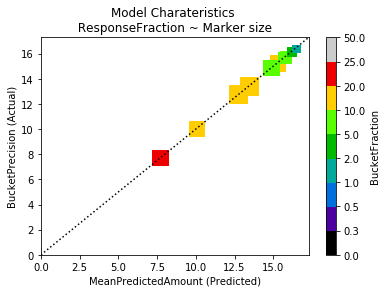

In [39]:
TestDataset = mltk.score_processed_dataset(TestDataset, SelectModel, edges=None, score_label=None, fill_missing=0)
Robustnesstable = mltk.robustness_table(ResultsSet=TestDataset, target_variable=targetVariable, score_variable=scoreVariable,  score_label=scoreLabel, condensed=False, show_plot=True)
Robustnesstable.style.background_gradient(cmap='RdYlGn').set_precision(3)

In [40]:
print('RMSE =', SelectModel.get_rmse())
print('R^2 =', SelectModel.get_r2())

RMSE = 0.3140544815101011
R^2 = 0.9892415130237985


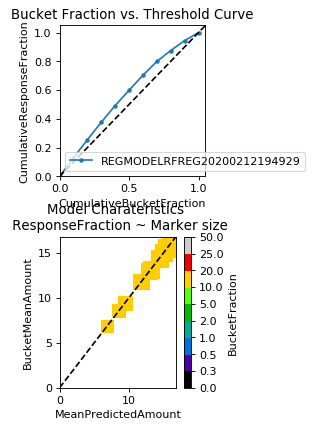

In [41]:
SelectModel.plot_eval_matrics(comparison=False)

## Cite as
```
@misc{mltk2019,
  author =  "Sumudu Tennakoon",
  title = "MLToolKit(mltk): A Simplified Toolkit for Unifying End-To-End Machine Learing Projects",
  year = 2019,
  publisher = "GitHub",
  howpublished = {\url{https://mltoolkit.github.io/mltk/}},
  version = "0.1.11"
}
```

<hr>
This notebook and related materials were developed by Sumudu Tennakoon to demostrate the MLToolkit python library and its interoperability with the standared Python data analysis and machine learning packages (e.g. Pandas, Sci-kitlearn, Statsmodel, TensorFlow, Catboost, etc.)
Create Date: July 15, 2019; Last Update: December 31, 2019. 
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)